#  Determining Indicators of Heavy Traffic Using [Westbound Traffic Data](https://en.wikipedia.org/wiki/Interstate_94) Analysis

We are going to analyze Westbound traffic data available for download at [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) to understand the factors that that are correlated and might be causative agents of traffic congestion

## 1. Setting Up Stuff

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.1 Read and Explore Data

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## 2. Analyzing Traffic Volume

### 2.1 Traffic Volume: Exploring General Characteristics

The distribution of traffic volume seem to be bimodal as is evident in the figure below

Text(0.5, 0, 'Traffic Volume')

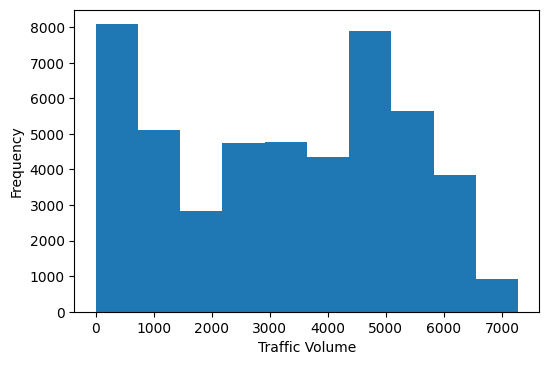

In [6]:
traffic['traffic_volume'].plot.hist()
plt.xlabel("Traffic Volume")

In [7]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### 2.2 Traffic Volume: Day vs. Night

Traffic here seems to mostly be heavy during the day. We see that for the large part, it ranges between 4000 and 5000 vehicles per day during the day. This average value reduces to less than 1000 per night

In [8]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic.head()['date_time']

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

In [9]:
daytime_bool_mask = ((traffic['date_time'].dt.hour >= 7) &
                       (traffic['date_time'].dt.hour < 19))

traffic['daytime'] = 0
traffic.loc[daytime_bool_mask, 'daytime'] = 1

traffic['daytime'].value_counts()

0    24327
1    23877
Name: daytime, dtype: int64

Text(0.5, 0, 'Traffic Volume')

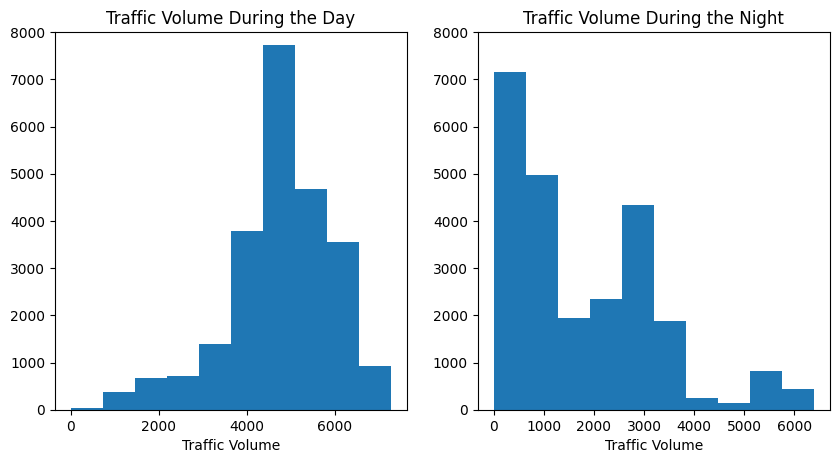

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(traffic.loc[traffic['daytime'] == 1, 'traffic_volume'])
plt.ylim([0, 8000])
plt.title('Traffic Volume During the Day')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(traffic.loc[traffic['daytime'] == 0, 'traffic_volume'])
plt.ylim([0, 8000])
plt.title('Traffic Volume During the Night')
plt.xlabel('Traffic Volume')

### 2.3 Traffic Volume: By Month

We first ignore night time traffic since we have established from above histogram that trafficis often light during the night. Thus we focus on day traffic from here henceforth

In [11]:
daytime_traffic_data = traffic.loc[traffic['daytime']==1, ['date_time','traffic_volume']]
daytime_traffic_data['month'] = daytime_traffic_data['date_time'].dt.month
by_month = daytime_traffic_data.groupby('month').mean()['traffic_volume']

In [12]:
by_month

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

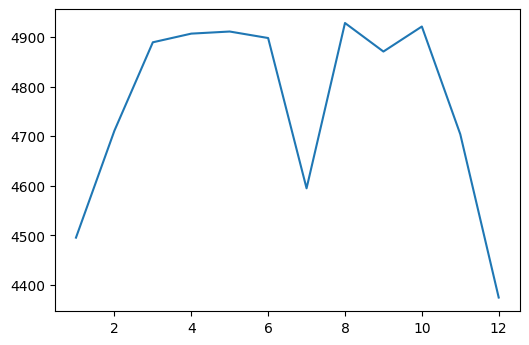

In [13]:
plt.plot(by_month)

### 2.4 Traffic Volume: By Day of Week

We find that traffic is heavier on weekdays than on weekends. The average traffic on Sundays, for instance, is less than 3500 vehicles. This value ranges largely above 5000 on weekdays

In [14]:
daytime_traffic_data['dayofweek'] = daytime_traffic_data['date_time'].dt.dayofweek
by_dayofweek = daytime_traffic_data.groupby('dayofweek').mean()['traffic_volume']
by_dayofweek

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

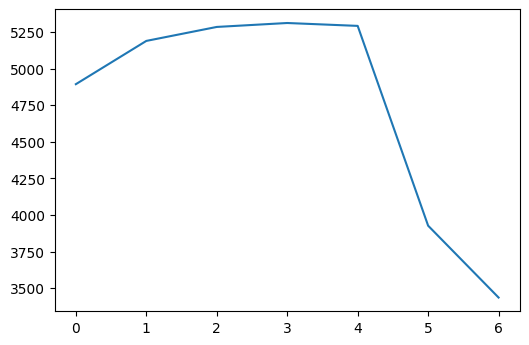

In [15]:
plt.plot(by_dayofweek)

### 2.5 By Time of Day

First, we split the data in two; business day and weekends. That's because the average by time of day will be dragged down by the time on weekends that are significantly lower on average. Traffic on weekend is also likely not to lead to congestion

In [16]:
daytime_traffic_data['hour'] = daytime_traffic_data['date_time'].dt.hour
business_days = daytime_traffic_data.copy()[daytime_traffic_data['dayofweek'] <= 4]
weekend = daytime_traffic_data.copy()[daytime_traffic_data['dayofweek'] >= 5]

In [17]:
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

In [18]:
print(by_hour_business)
print("\n")
print(by_hour_weekend)

      traffic_volume     month  dayofweek
hour                                     
7        6030.413559  6.363390   1.984407
8        5503.497970  6.567659   1.989175
9        4895.269257  6.484386   1.981263
10       4378.419118  6.481283   1.957888
11       4633.419470  6.448819   1.979957
12       4855.382143  6.569286   1.989286
13       4859.180473  6.465237   1.982988
14       5152.995778  6.588318   1.990852
15       5592.897768  6.541397   1.962563
16       6189.473647  6.580464   1.995081
17       5784.827133  6.510576   1.994165
18       4434.209431  6.529126   1.988211


      traffic_volume     month  dayofweek
hour                                     
7        1589.365894  6.518212   5.501656
8        2338.578073  6.523256   5.503322
9        3111.623917  6.603120   5.492201
10       3686.632302  6.491409   5.503436
11       4044.154955  6.482883   5.491892
12       4372.482883  6.500901   5.493694
13       4362.296564  6.580470   5.497288
14       4358.543796  6.644161  

On weekends, we see that traffic peaks at around 12 noon. the traffic volume at this time is roughly 4200 cars. On weekdays, traffic peaks at around 4pm and also ni the morning around 8am. Traffic is least heavy at around 10am on weekdays, while it is least heavy around 7am in on weekends

(0.0, 6500.0)

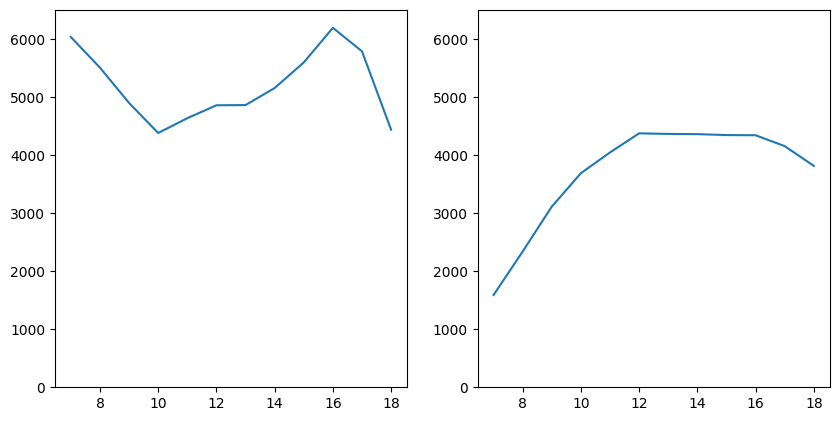

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.ylim([0, 6500])

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.ylim([0, 6500])

### 2.6 Numerical Weather Indicators

Temperatuer has the strongest correlation with traffic volume as is evident below. The correlation value (0.13) is, however, very low and can not be considered reliable in predicting traffic volume. We, therefore use it to plot a scatter plot with traffic volume

In [20]:
traffic.loc[:, ['traffic_volume','temp', 'rain_1h', 'clouds_all', 'snow_1h']].corr()['traffic_volume']

traffic_volume    1.000000
temp              0.130299
rain_1h           0.004714
clouds_all        0.067054
snow_1h           0.000733
Name: traffic_volume, dtype: float64

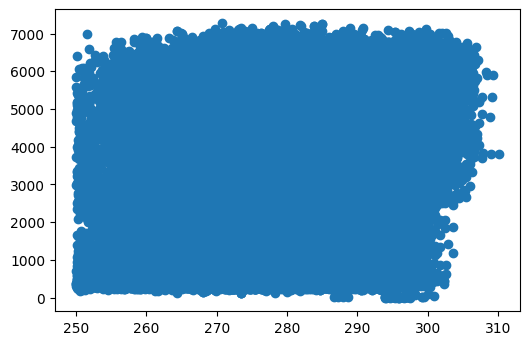

In [21]:
traffic_modified = traffic.loc[traffic['temp'] > 250, :]
plt.scatter(traffic_modified['temp'], traffic_modified['traffic_volume'])

### 2.7 Categorical Weather Indicators

In [22]:
daytime_traffic_data = traffic[daytime_bool_mask]
by_weather_main = daytime_traffic_data.groupby('weather_main').mean()
by_weather_description = daytime_traffic_data.groupby('weather_description').mean()

The average traffic volume by weather main is relatively similar for all conditions. Whether there's clear weather, thunderstom, or drizzle. They all average slightly below 5000 

<BarContainer object of 11 artists>

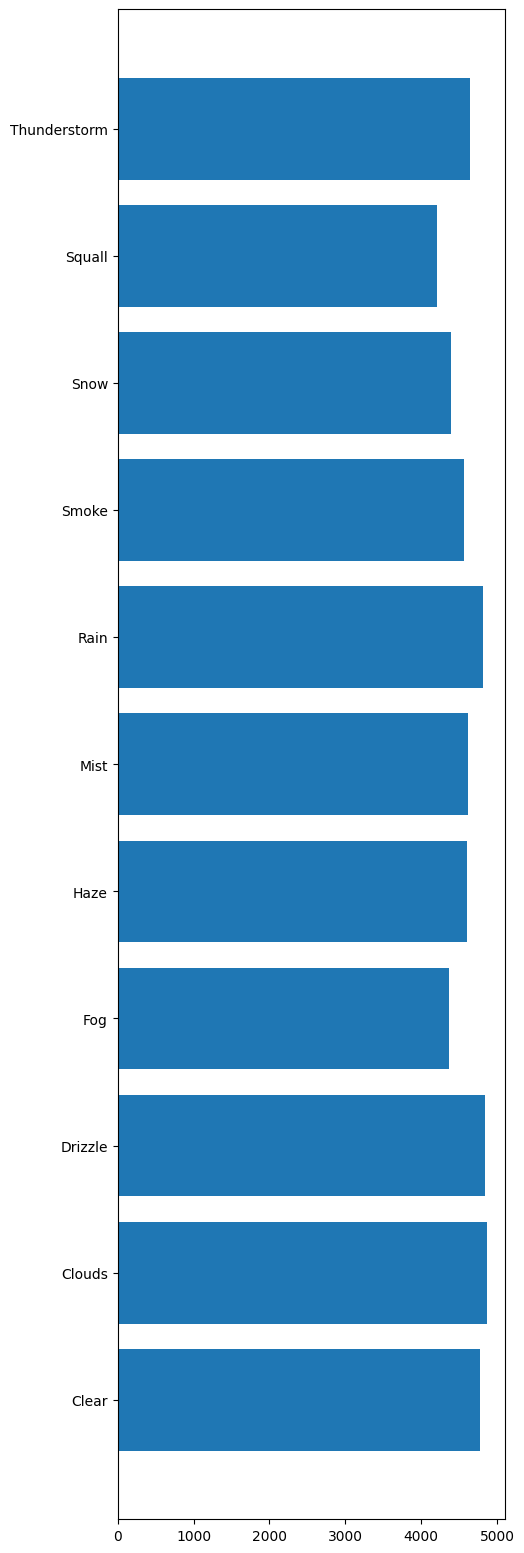

In [23]:
plt.figure(figsize=(5, 20))
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])

We see from the figure that follows shortly that some weather conditions are associated with heavy traffic. For instance, traffic during light rain and snow, and shower snow have an average of traffic volume over 5000

<BarContainer object of 38 artists>

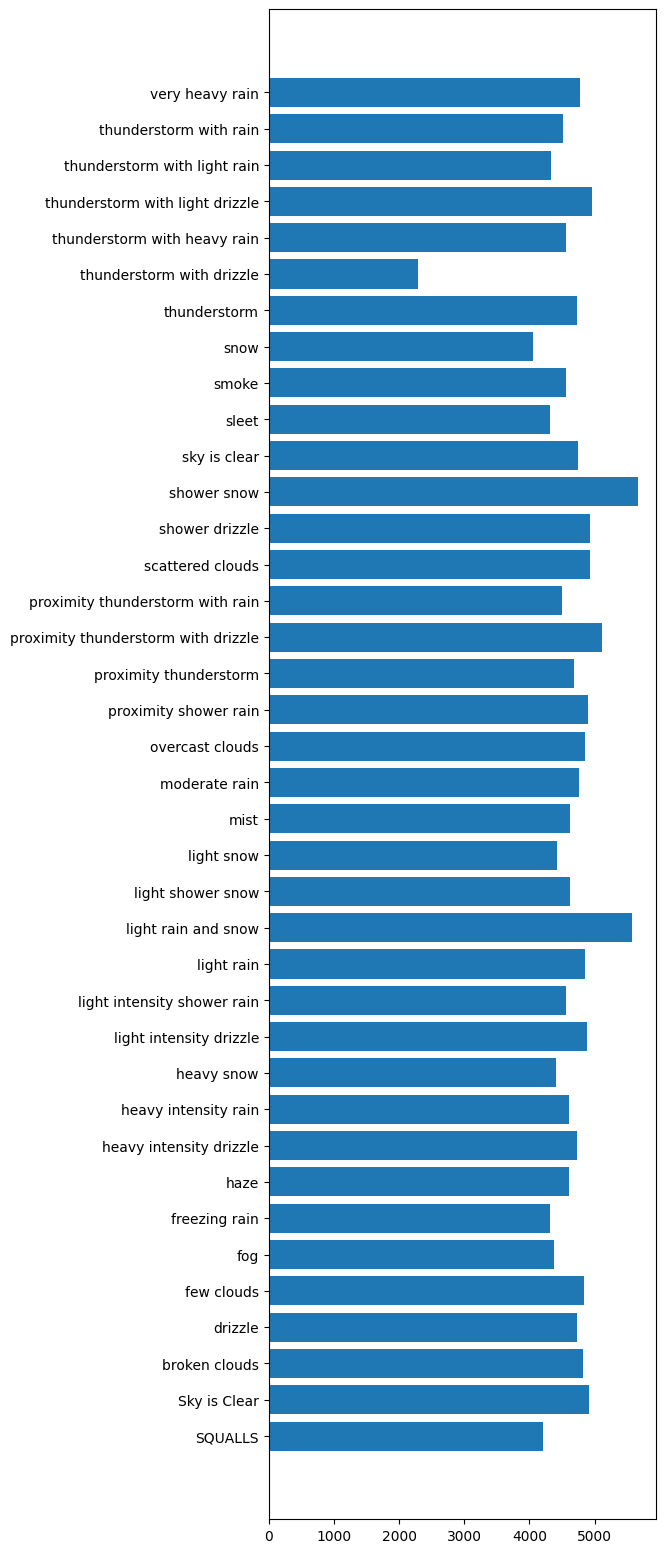

In [24]:
plt.figure(figsize=(5, 20))
plt.barh(by_weather_description.index, by_weather_description['traffic_volume'])


## 3. Conclusion

We have examined varous factors that are associated, and area likely causative agents, of traffic congestion. Among the factors analyzed include time factors and weather factors. We find that weather doesn't have that huge of an effect on traffic. As for time, we see that traffic changes radically depending on time. Certain months are associated with heavier traffic than others, certain days of the week (weekdays) are associated with heavier traffic, and also time of the day affect traffic too. Fo instance, heavy traffic is often witnessed in the morning (around 7) on weekdays, while it is generally often empty on weekends